In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [55]:
df=pd.read_csv("/content/toxicity_parsed_dataset.csv", engine="pyarrow", header=None, names=["Text", "oh_label"])

In [56]:
df.head()

,0,1,2,Text,oh_label
0,index,Text,ed_label_0,ed_label_1,oh_label
1,0,This: :One can make an analogy in mathematical...,0.9,0.1,0
2,1,` :Clarification for you (and Zundark's righ...,1,0,0
3,2,Elected or Electoral? JHK,1,0,0
4,3,`This is such a fun entry. Devotchka I once...,1,0,0


In [57]:
df.isnull().sum()

0           0
1           0
2           0
Text        0
oh_label    0
dtype: int64

In [58]:
df=df.dropna()

In [59]:
df.describe()

,0,1,2,Text,oh_label
count,159687,159687,159687,159687,159687
unique,159687,159389,67,67,3
top,index,Err:509,1,0,0
freq,1,34,90563,90563,144324


In [60]:
df.shape

(159687, 5)

In [61]:
!pip install keras

In [62]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import word2vec

from collections import Counter
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.pipeline import Pipeline
from nltk.stem.porter import PorterStemmer
import string
from wordcloud import WordCloud

from textblob import TextBlob

import keras
import tensorflow as tf
from keras.preprocessing.text import Tokenizer

from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [64]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [65]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import word2vec

In [66]:
pip install contractions

In [67]:
import contractions

In [68]:
only_english = set(nltk.corpus.words.words())
def clean_text(text):

    sample = text
    sample = " ".join([x.lower() for x in sample.split()])
    sample = re.sub(r"\S*https?:\S*", '', sample) #links and urls
    sample = re.sub('\[.*?\]', '', sample) #text between [square brackets]
    sample = re.sub('\(.*?\)', '', sample) #text between (parenthesis)
    sample = re.sub('#', ' ', sample) #remove hashtags
    sample = ' '.join([x for x in sample.split() if not x.startswith('@')]) # remove mentions with @
    sample = " ".join([contractions.fix(x) for x in sample.split()])  # fixes contractions like you're to you are
    sample = re.sub('[%s]' % re.escape(string.punctuation), ' ', sample) #punctuations
    sample = re.sub('\w*\d\w', '', sample) #digits with trailing or preceeding text
    sample = re.sub(r'\n', ' ', sample) #new line character
    sample = re.sub(r'\\n', ' ', sample) #new line character
    sample = re.sub("[''""...“”‘’…]", '', sample) #list of quotation marks
    sample = " ".join(x.strip() for x in sample.split()) #strips whitespace
    sample = re.sub(r', /<[^>]+>/', '', sample)    #HTML attributes

    sample = ' '.join(list(filter(lambda ele: re.search("[a-zA-Z\s]+", ele) is not None, sample.split()))) #languages other than english

    sample = sample.strip()
    sample = " ".join([x.strip() for x in sample.split()])

    return sample

In [69]:
df['cleaned_text'] = df['Text'].apply(lambda x: clean_text(str(x)))
df


,0,1,2,Text,oh_label,cleaned_text
0,index,Text,ed_label_0,ed_label_1,oh_label,ed label
1,0,This: :One can make an analogy in mathematical...,0.9,0.1,0,
2,1,` :Clarification for you (and Zundark's righ...,1,0,0,
3,2,Elected or Electoral? JHK,1,0,0,
4,3,`This is such a fun entry. Devotchka I once...,1,0,0,
...,...,...,...,...,...,...
159682,159681,` These sources don't exactly exude a sense ...,1,0,0,
159683,159682,The Institute for Historical Review is a pee...,1,0,0,
159684,159683,:The way you're trying to describe it in this...,1,0,0,
159685,159684,== Warning == There is clearly a protection...,0.6,0.4,0,


In [70]:
cleaned_text=df['cleaned_text']

In [71]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
X=cv.fit_transform(cleaned_text).toarray()
y=df['oh_label']

In [72]:
print(X)
print(y)

[[1 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]
0         oh_label
1                0
2                0
3                0
4                0
            ...   
159682           0
159683           0
159684           0
159685           0
159686           0
Name: oh_label, Length: 159687, dtype: object


In [73]:
len(X[0])

2

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [75]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
GN_model=classifier.fit(X_train, y_train)

In [76]:
y_pred = classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[28766     0     0]
 [ 3171     0     0]
 [    1     0     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:515: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:516: RuntimeWarning: divide by zero encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:516: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:516: RuntimeWarning: invalid value encountered in subtract
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)


0.9006825724841881

In [77]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
SC_model=classifier.fit(X_train, y_train)

In [78]:
y_pred = classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [79]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[28766     0     0]
 [ 3171     0     0]
 [    1     0     0]]


0.9006825724841881

In [80]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_model=KNN.fit(X_train, y_train)

In [81]:
y_pred = KNN.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [82]:
from sklearn.metrics import r2_score,confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[28766     0     0]
 [ 3171     0     0]
 [    1     0     0]]


0.9006825724841881

In [95]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT_model=classifier.fit(X_train, y_train)

In [96]:
y_pred = classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[28766     0     0]
 [ 3171     0     0]
 [    1     0     0]]


0.9006825724841881

[Text(0.5, 0.5, 'entropy = 0.454\nsamples = 127749\nvalue = [115558, 12191]')]

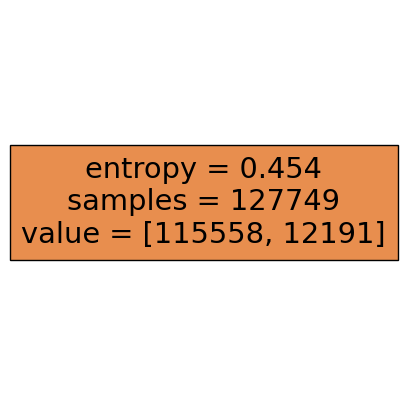

In [99]:
from sklearn import tree
plt.figure(figsize=(5,5))
tree.plot_tree(classifier, filled=True)

In [106]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_model=classifier.fit(X_train, y_train)

In [107]:
y_pred = classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[28766     0     0]
 [ 3171     0     0]
 [    1     0     0]]


0.9006825724841881

In [87]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
log_model=classifier.fit(X_train, y_train)

In [88]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [89]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[28766     0     0]
 [ 3171     0     0]
 [    1     0     0]]


0.9006825724841881

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
<ipython-input-92-ff13a287dbe0>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(result)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     28766
           1       0.00      0.00      0.00      3171
    oh_label       0.00      0.00      0.00         1

    accuracy                           0.90     31938
   macro avg       0.30      0.33      0.32     31938
weighted avg       0.81      0.90      0.85     31938



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
<ipython-input-92-ff13a287dbe0>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(result)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     28766
           1       0.00      0.00      0.00      3171
    oh_label       0.00      0.00      0.00         1

    accuracy                           0.90     31938
   macro avg       0.30      0.33      0.32     31938
weighted avg       0.81      0.90      0.85     31938



/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:515: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:516: RuntimeWarning: divide by zero encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:516: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:516: RuntimeWarning: invalid value encountered in subtract
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
<ipython-input-92-ff13a287dbe0>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(result)
/usr/local/lib/pyth

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     28766
           1       0.00      0.00      0.00      3171
    oh_label       0.00      0.00      0.00         1

    accuracy                           0.90     31938
   macro avg       0.30      0.33      0.32     31938
weighted avg       0.81      0.90      0.85     31938



<ipython-input-92-ff13a287dbe0>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(result)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in label

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     28766
           1       0.00      0.00      0.00      3171
    oh_label       0.00      0.00      0.00         1

    accuracy                           0.90     31938
   macro avg       0.30      0.33      0.32     31938
weighted avg       0.81      0.90      0.85     31938



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
<ipython-input-92-ff13a287dbe0>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(result)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     28766
           1       0.00      0.00      0.00      3171
    oh_label       0.00      0.00      0.00         1

    accuracy                           0.90     31938
   macro avg       0.30      0.33      0.32     31938
weighted avg       0.81      0.90      0.85     31938



<ipython-input-92-ff13a287dbe0>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(result)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in label

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     28766
           1       0.00      0.00      0.00      3171
    oh_label       0.00      0.00      0.00         1

    accuracy                           0.90     31938
   macro avg       0.30      0.33      0.32     31938
weighted avg       0.81      0.90      0.85     31938

                   Models   Accuracy
0    KNeighborsClassifier  90.068257
0  RandomForestClassifier  90.068257
0              GaussianNB  90.068257
0  DecisionTreeClassifier  90.068257
0                     SVC  90.068257
0      LogisticRegression  90.068257


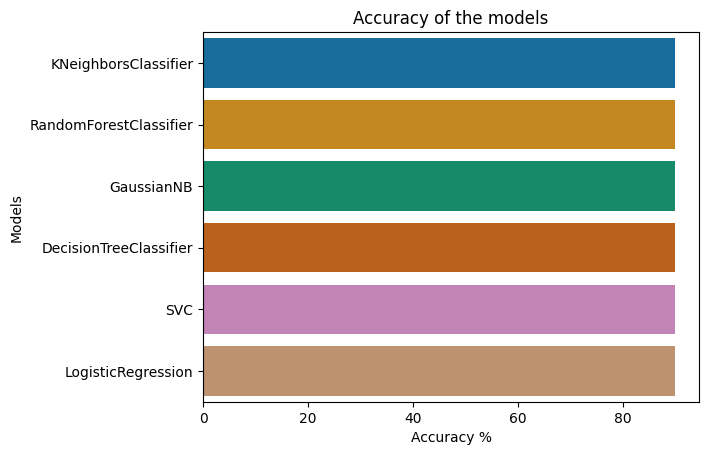

In [92]:
import seaborn as sea
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
models = [KNN_model,rf_model,GN_model,DT_model,SC_model,log_model]

result = []
results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = cross_val_score(model,X_test,y_test,cv=10,scoring="accuracy").mean()
    result = pd.DataFrame([[names, accuracy*100]], columns= ["Models","Accuracy"])
    results = results.append(result)
    print(classification_report(y_test, y_pred))

sea.barplot(x= 'Accuracy', y = 'Models', data=results, palette="colorblind")
plt.xlabel('Accuracy %')
plt.title('Accuracy of the models')
print(results)